# Практическая работа 1
## Датасет - Wine Quality
## Выполнил: __Щеткин Дмитрий Сергеевич__

группа 2.1

### **Оглавление**

1. Анализ и подготовка данных
  - 1.1. Импорт библиотек
  - 1-2. Чтение данных
  - 1-3. Первичный анализ
  - 1-4. Разделение выборок
  - 1-5. Работа с пропусками
  - 1-6. Работа с выбросами
  - 1-7. Стандартизация
  - 1-8. Дополнительно
2. Обучение машинных моделей и нахождение наиболее удачной
  - 2-1. Импорт библиотек и функция для оценки модели
  - 2-2. Baseline модели
  - 2-3. Продвинутые классификаторы
  - 2-4. Методы перебора гиперпараметров
  - 2-5. Сравнение моделей


### **1. Анализ и подготовка данных**

#### **1-1. Импорт библиотек**

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

#### **1-2. Чтение данных**

In [2]:
# Чтение данных
df = pd.read_csv('data/WineQT.csv')
df = df.drop(columns=['Id'])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### **1-3. Первичный анализ**

In [3]:
# Первичный анализ
print("Размер датасета:", df.shape)
print("\nПервые 5 строк:\n", df.head())
print("\nСтатистическое описание:\n", df.describe())
print("\nТипы данных:\n", df.dtypes)
print("\nПропуски в столбцах:\n", df.isnull().sum())

Размер датасета: (1143, 12)

Первые 5 строк:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        

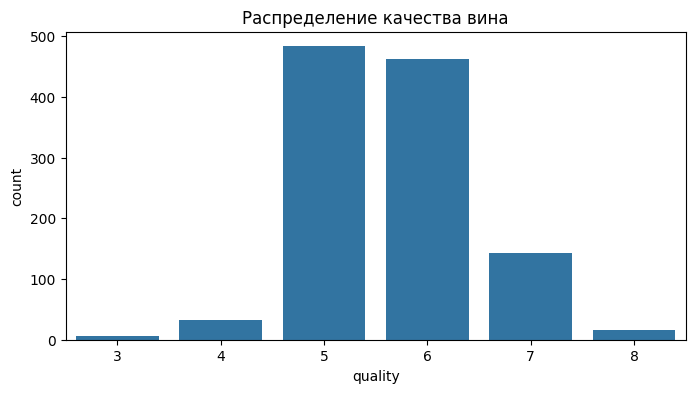

In [4]:
# График распределения качества вина
plt.figure(figsize=(8,4))
sns.countplot(x='quality', data=df)
plt.title('Распределение качества вина')
plt.show()

In [5]:
# Группировка классов
def quality_group(q):
    if q <= 4:
        return 0  # низкое
    elif q <= 6:
        return 1  # среднее
    else:
        return 2  # высокое

df['quality'] = df['quality'].apply(quality_group)

В данном блоке я сделал группировку классов, для увеличения точности.

Вот результаты работы до группировки классов:

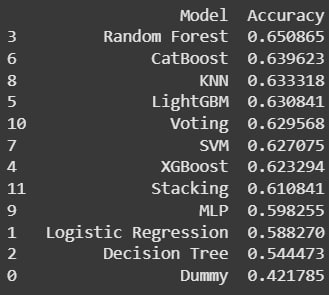

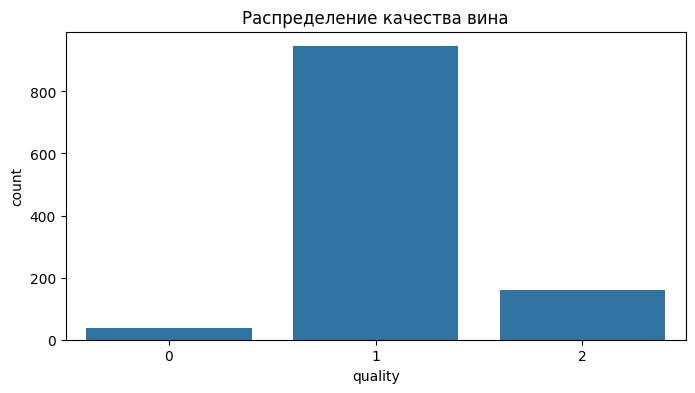

In [6]:
# График распределения качества вина
plt.figure(figsize=(8,4))
sns.countplot(x='quality', data=df)
plt.title('Распределение качества вина')
plt.show()

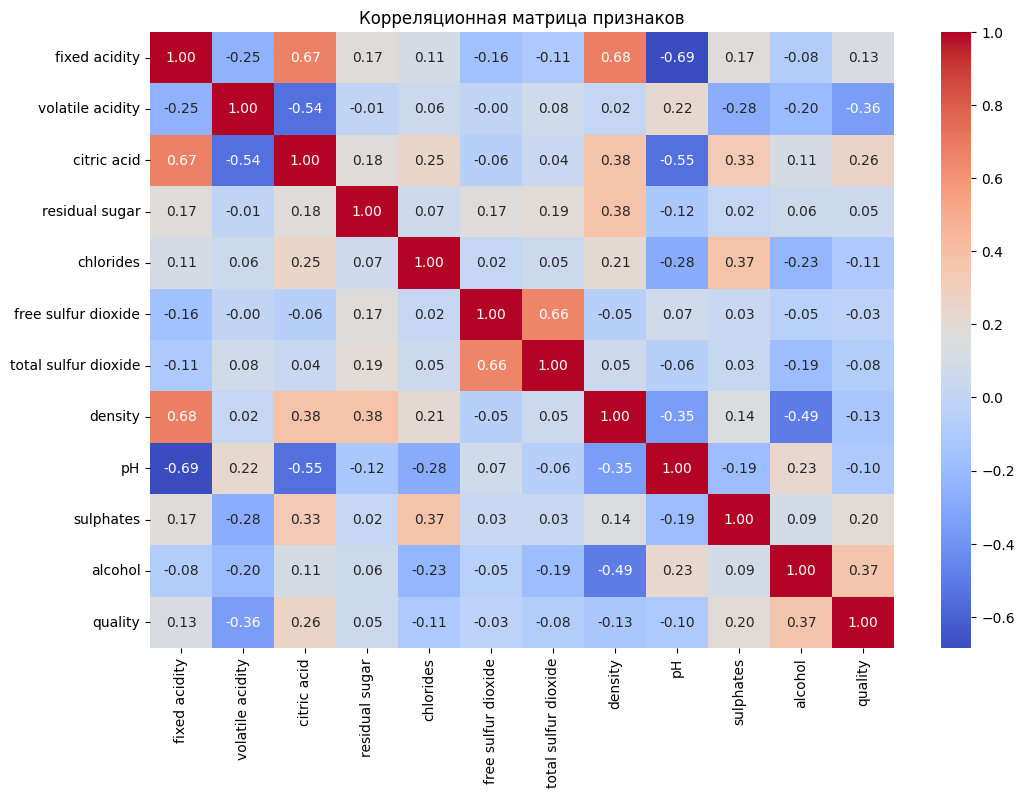

In [7]:
# Корреляционная матрица
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица признаков')
plt.show()

#### **1-4. Разделение выборок**

In [8]:
# Разделение выборок
# Сначала train_val и test
train_val, test = train_test_split(df, test_size=0.15, stratify=df['quality'], random_state=42)

# Затем train и validation
train, val = train_test_split(train_val, test_size=0.1765, stratify=train_val['quality'], random_state=42)
# 0.1765 примерно 15% от первоначального, чтобы итогово: 70% train, 15% val, 15% test

print(f"Train: {train.shape}, Validation: {val.shape}, Test: {test.shape}")

Train: (799, 12), Validation: (172, 12), Test: (172, 12)


#### **1-5. Работа с пропусками**

In [9]:
# Работа с пропусками
print("Пропуски в обучающей выборке:\n", train.isnull().sum())

Пропуски в обучающей выборке:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


#### **1-6. Работа с выбросами**

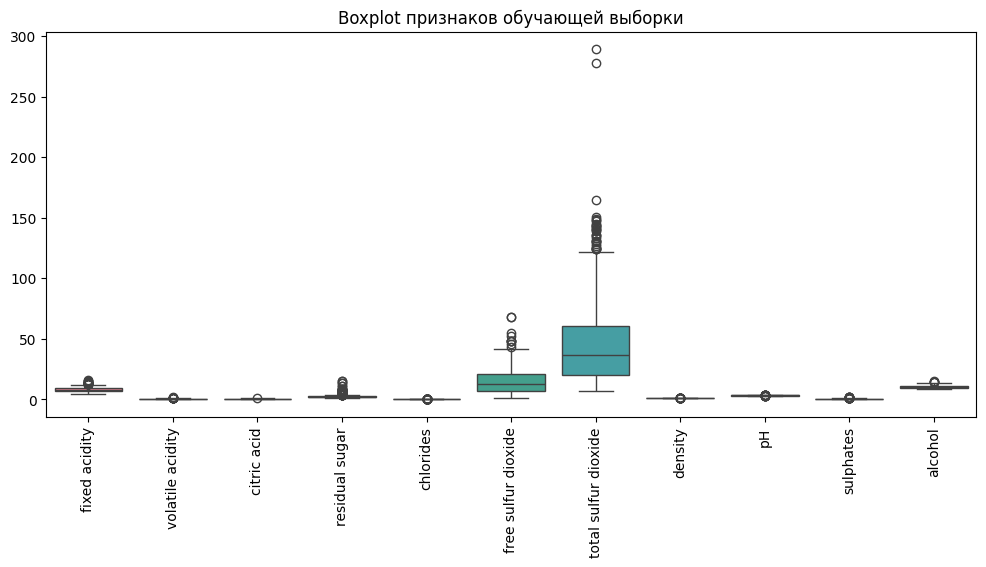

In [10]:
# Визуализируем выбросы для пары признаков
plt.figure(figsize=(12,5))
sns.boxplot(data=train.drop(columns=['quality']))
plt.xticks(rotation=90)
plt.title('Boxplot признаков обучающей выборки')
plt.show()

#### **1-7. Стандартизация**

In [11]:
# Стандартизация
# Сохраняем исходные данные с колонкой 'quality'
train_original = train.copy()
val_original = val.copy()
test_original = test.copy()

# Убираем колонку 'quality' для нормализации
features_train = train.drop(columns=['quality'])
features_val = val.drop(columns=['quality'])
features_test = test.drop(columns=['quality'])

# Применяем StandardScaler для стандартизации признаков
scaler_standard = StandardScaler()
features_scaled_train = pd.DataFrame(scaler_standard.fit_transform(features_train), columns=features_train.columns)
features_scaled_val = pd.DataFrame(scaler_standard.transform(features_val), columns=features_val.columns)
features_scaled_test = pd.DataFrame(scaler_standard.transform(features_test), columns=features_test.columns)

# Добавляем обратно колонку 'quality' из исходных датафреймов
train = features_scaled_train.copy()
train['quality'] = train_original['quality'].values

val = features_scaled_val.copy()
val['quality'] = val_original['quality'].values

test = features_scaled_test.copy()
test['quality'] = test_original['quality'].values

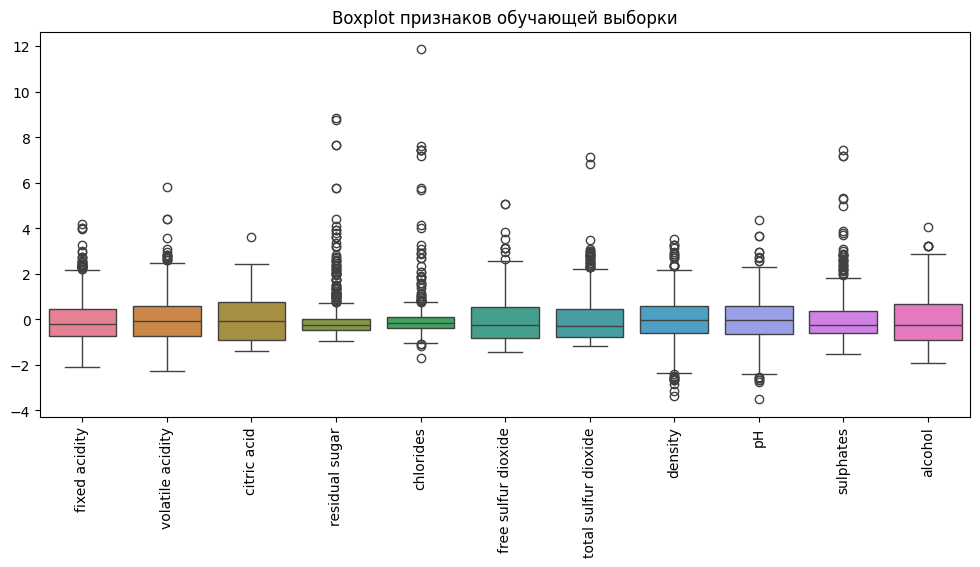

In [12]:
# Визуализируем выбросы для пары признаков после стандартизации
plt.figure(figsize=(12,5))
sns.boxplot(data=train.drop(columns=['quality']))
plt.xticks(rotation=90)
plt.title('Boxplot признаков обучающей выборки')
plt.show()

#### **1-8. Дополнительно**


In [13]:
# Проверка мультиколлинеарности признаков с помощью VIF
X_vif = train.drop(columns=['quality'])

# Вычисляем VIF для каждого признака
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data.sort_values('VIF', ascending=False))

                 Feature       VIF
0          fixed acidity  8.671187
7                density  6.981027
8                     pH  3.665187
10               alcohol  3.253264
2            citric acid  3.211511
6   total sulfur dioxide  2.122079
5    free sulfur dioxide  1.959104
3         residual sugar  1.751806
1       volatile acidity  1.727228
4              chlorides  1.578371
9              sulphates  1.459133


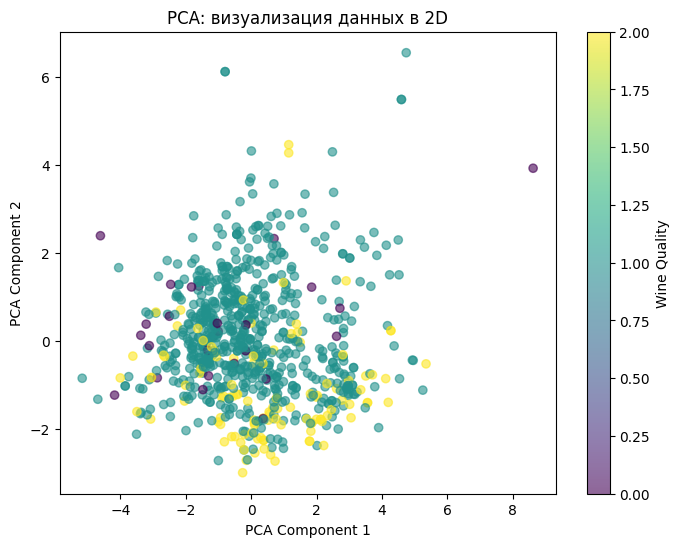

In [14]:
#  Применение PCA для снижения размерности и визуализации данных

X = train.drop(columns=['quality'])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Визуализация главных компонент с цветом по 'quality'
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=train['quality'], cmap='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Wine Quality')
plt.title('PCA: визуализация данных в 2D')
plt.show()

### **2. Обучение машинных моделей и нахождение наиболее удачной**

#### **2-1. Импорт библиотек и функция для оценки модели**

In [15]:
!pip install catboost

In [16]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import VotingClassifier, StackingClassifier

import xgboost as xgb
import lightgbm as lgb
import catboost as cb

from sklearn.metrics import accuracy_score

In [17]:
# Отключение предупреждений
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.exceptions import UndefinedMetricWarning

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [18]:
# Определим обучающие и валидационные данные
X_train = train.drop('quality', axis=1)
y_train = train['quality']
X_val = val.drop('quality', axis=1)
y_val = val['quality']

In [19]:
# Функция для оценки модели
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print("Classification Report:")
    print(classification_report(y_val, y_pred))
    print("Confusion Matrix:")
    ConfusionMatrixDisplay.from_predictions(y_val, y_pred, cmap='Blues')
    plt.show()

#### **2-2. Baseline модели**

Dummy Classifier

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.83      1.00      0.90       142
           2       0.00      0.00      0.00        24

    accuracy                           0.83       172
   macro avg       0.28      0.33      0.30       172
weighted avg       0.68      0.83      0.75       172

Confusion Matrix:


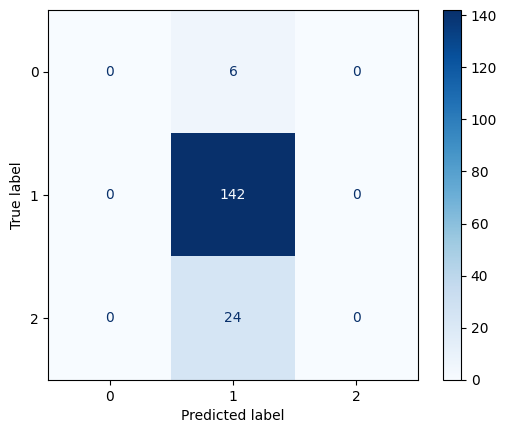

In [20]:
# 1. DummyClassifier
dummy = DummyClassifier(strategy='most_frequent')
print("Dummy Classifier\n")
evaluate_model(dummy, X_train, y_train, X_val, y_val)

Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.84      0.96      0.90       142
           2       0.44      0.17      0.24        24

    accuracy                           0.82       172
   macro avg       0.43      0.38      0.38       172
weighted avg       0.76      0.82      0.78       172

Confusion Matrix:


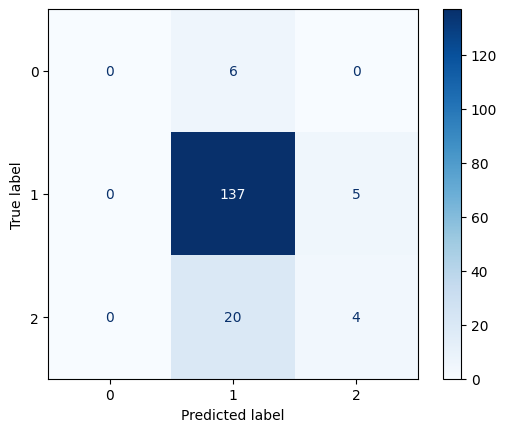

In [21]:
# 2. Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
print("Logistic Regression\n")
evaluate_model(log_reg, X_train, y_train, X_val, y_val)

Decision Tree

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.86      0.84      0.85       142
           2       0.31      0.33      0.32        24

    accuracy                           0.74       172
   macro avg       0.39      0.39      0.39       172
weighted avg       0.75      0.74      0.75       172

Confusion Matrix:


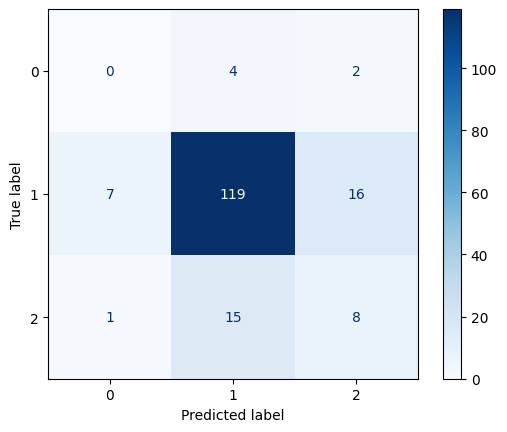

In [22]:
# 3. Decision Tree
tree = DecisionTreeClassifier()
print("Decision Tree\n")
evaluate_model(tree, X_train, y_train, X_val, y_val)

#### **2-3. Продвинутые классификаторы**

Random Forest

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      0.94      0.90       142
           2       0.47      0.29      0.36        24

    accuracy                           0.82       172
   macro avg       0.44      0.41      0.42       172
weighted avg       0.77      0.82      0.79       172

Confusion Matrix:


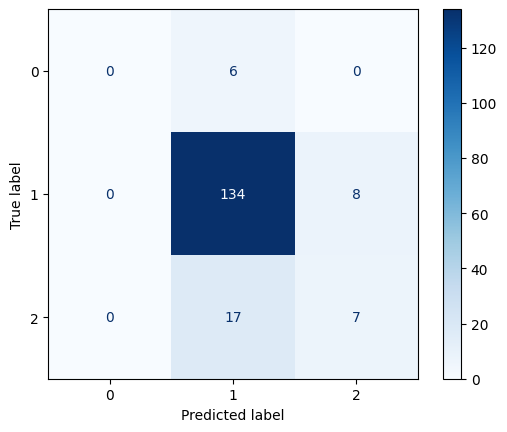

In [23]:
# 4. Random Forest
rf = RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_split=4, random_state=42)
print("Random Forest\n")
evaluate_model(rf, X_train, y_train, X_val, y_val)

XGBoost

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.84      0.92      0.88       142
           2       0.36      0.21      0.26        24

    accuracy                           0.79       172
   macro avg       0.40      0.38      0.38       172
weighted avg       0.74      0.79      0.76       172

Confusion Matrix:


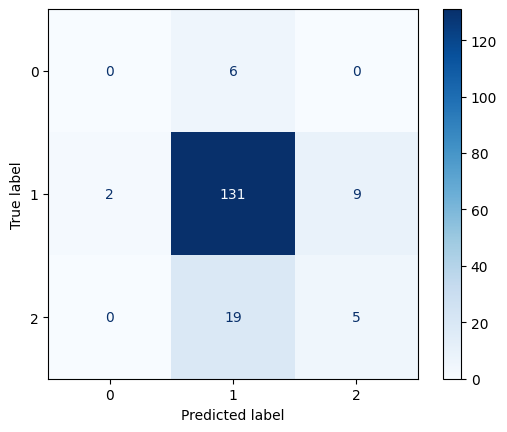

In [24]:
# 5. XGBoost
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)

xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')
print("XGBoost\n")
evaluate_model(xgb_model, X_train, y_train_encoded, X_val, y_val_encoded)

LightGBM

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.17      0.22         6
           1       0.85      0.91      0.88       142
           2       0.39      0.29      0.33        24

    accuracy                           0.80       172
   macro avg       0.53      0.46      0.48       172
weighted avg       0.77      0.80      0.78       172

Confusion Matrix:


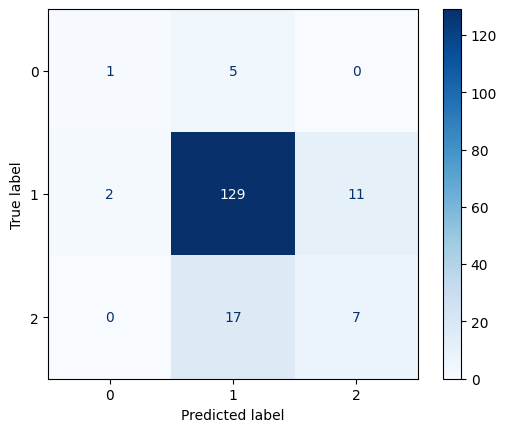

In [25]:
# 6. LightGBM
lgb_model = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.05, verbose=-1)
print("LightGBM\n")
evaluate_model(lgb_model, X_train, y_train, X_val, y_val)

CatBoost

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.84      0.94      0.88       142
           2       0.33      0.17      0.22        24

    accuracy                           0.80       172
   macro avg       0.39      0.37      0.37       172
weighted avg       0.74      0.80      0.76       172

Confusion Matrix:


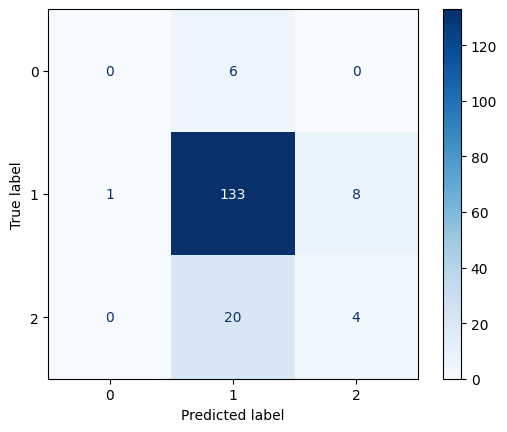

In [26]:
# 7. CatBoost
cb_model = cb.CatBoostClassifier(verbose=0, iterations=300, learning_rate=0.05, depth=6)
print("CatBoost\n")
evaluate_model(cb_model, X_train, y_train, X_val, y_val)

SVM

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      0.92      0.88       142
           2       0.35      0.25      0.29        24

    accuracy                           0.79       172
   macro avg       0.40      0.39      0.39       172
weighted avg       0.75      0.79      0.77       172

Confusion Matrix:


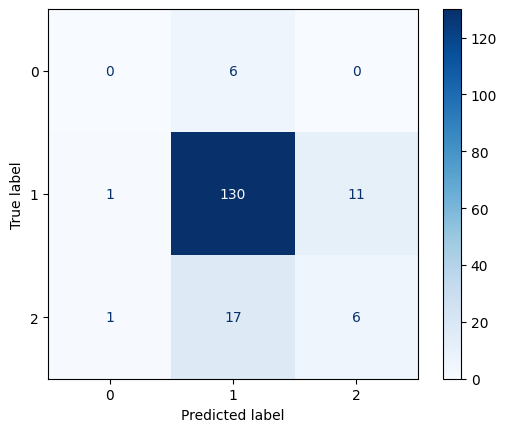

In [27]:
# 8. SVM
svm_model = SVC(kernel='rbf', C=10, gamma='scale', probability=True)
print("SVM\n")
evaluate_model(svm_model, X_train, y_train, X_val, y_val)

K-Nearest Neighbors

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      0.94      0.89       142
           2       0.43      0.25      0.32        24

    accuracy                           0.81       172
   macro avg       0.43      0.40      0.40       172
weighted avg       0.76      0.81      0.78       172

Confusion Matrix:


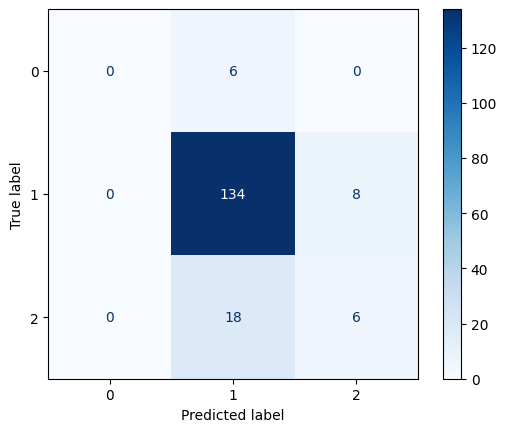

In [28]:
# 9. K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=10, weights='distance')
print("K-Nearest Neighbors\n")
evaluate_model(knn_model, X_train, y_train, X_val, y_val)

MLP

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.17      0.20         6
           1       0.87      0.93      0.90       142
           2       0.50      0.33      0.40        24

    accuracy                           0.82       172
   macro avg       0.54      0.48      0.50       172
weighted avg       0.80      0.82      0.80       172

Confusion Matrix:


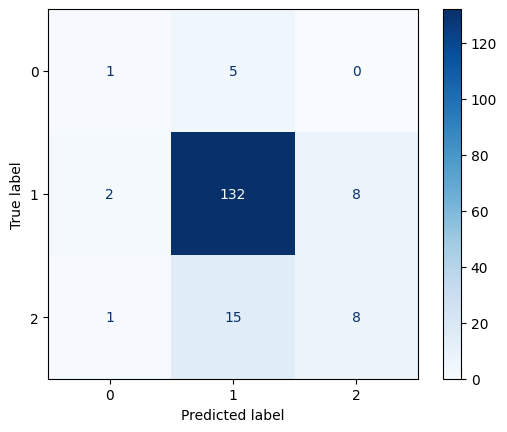

In [29]:
# 10. MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000)
print("MLP\n")
evaluate_model(mlp_model, X_train, y_train, X_val, y_val)

Voting Classifier

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.17      0.22         6
           1       0.84      0.91      0.87       142
           2       0.31      0.21      0.25        24

    accuracy                           0.78       172
   macro avg       0.50      0.43      0.45       172
weighted avg       0.75      0.78      0.76       172

Confusion Matrix:


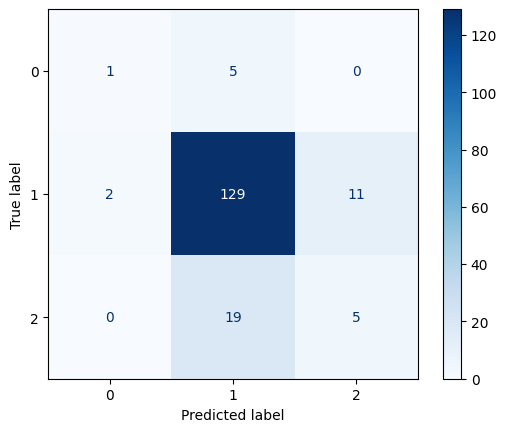

In [30]:
# 11. Ансамбль Voting
voting_model = VotingClassifier(estimators=[
        ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
        ('rf', RandomForestClassifier()),
        ('lgb', lgb.LGBMClassifier())
    ], voting='soft')
print("Voting Classifier\n")
evaluate_model(voting_model, X_train, y_train, X_val, y_val)

Stacking Classifier

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.84      0.95      0.89       142
           2       0.36      0.17      0.23        24

    accuracy                           0.81       172
   macro avg       0.40      0.37      0.37       172
weighted avg       0.74      0.81      0.77       172

Confusion Matrix:


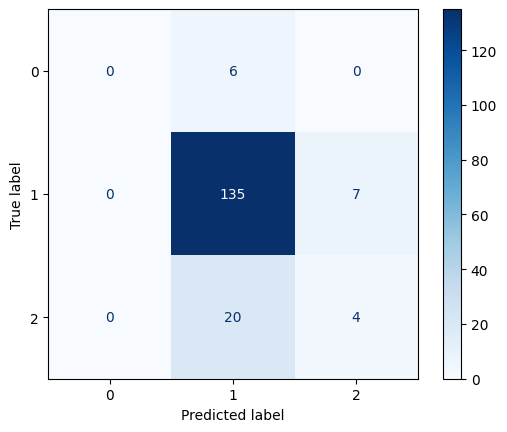

In [31]:
# 12. Ансамбль Stacking
stacking_model = StackingClassifier(estimators=[
    ('svm', SVC(probability=True)),
    ('knn', KNeighborsClassifier()),
    ('mlp', MLPClassifier(max_iter=300))
  ], final_estimator=LogisticRegression(max_iter=1000))
print("Stacking Classifier\n")
evaluate_model(stacking_model, X_train, y_train, X_val, y_val)

#### **2-4. Методы перебора гиперпараметров**

GridSearchCV Logistic Regression

Best Params: {'C': 0.1}
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.84      0.96      0.90       142
           2       0.38      0.12      0.19        24

    accuracy                           0.81       172
   macro avg       0.40      0.36      0.36       172
weighted avg       0.74      0.81      0.77       172

Confusion Matrix:


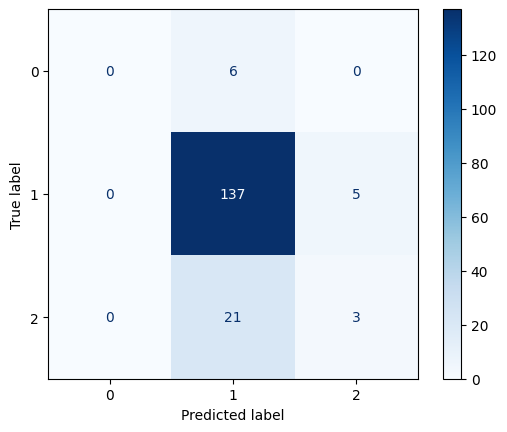

In [32]:
# GridSearchCV для логистической регрессии
param_grid = {'C': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("GridSearchCV Logistic Regression\n")
print("Best Params:", grid_search.best_params_)
evaluate_model(grid_search.best_estimator_, X_train, y_train, X_val, y_val)

#### **2-5. Сравнение моделей**

In [33]:
# Импорт библиотек
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

Training: Dummy


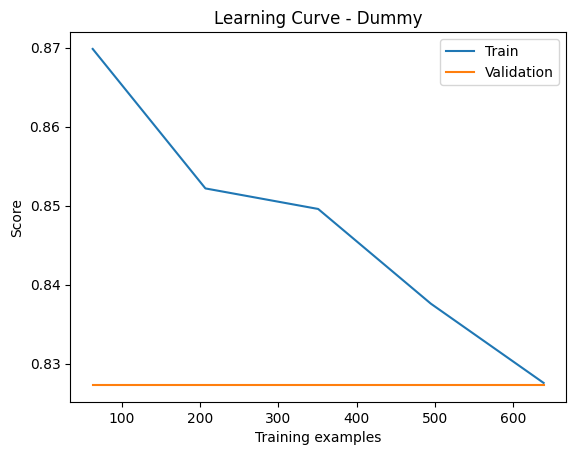

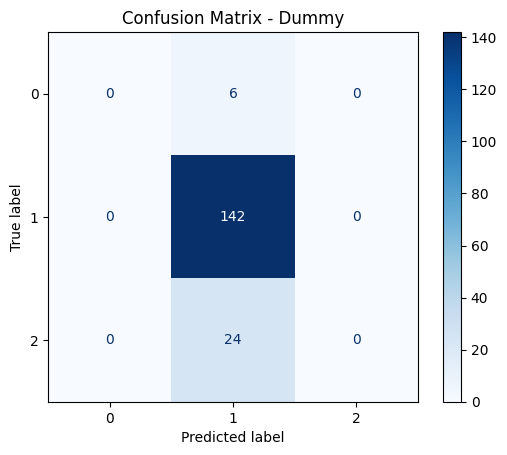

Training: Logistic Regression


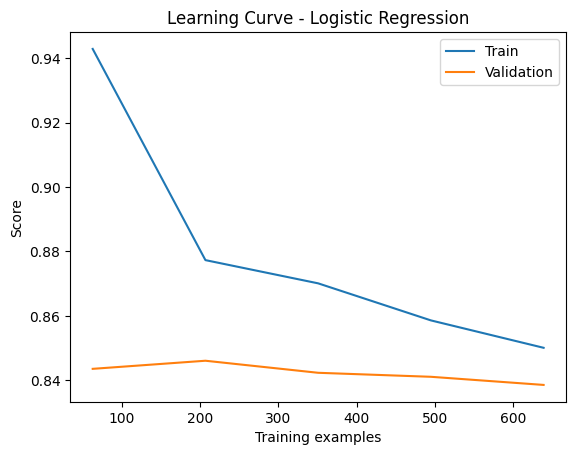

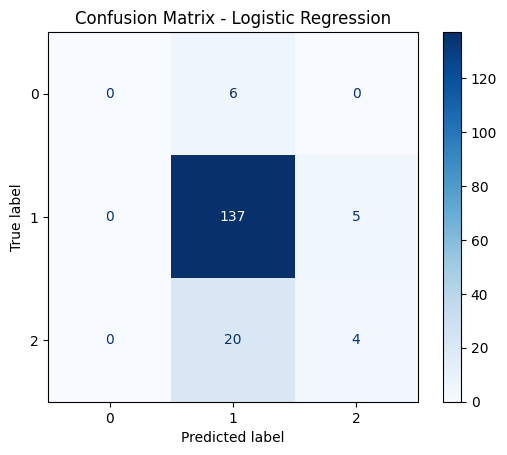

Training: Decision Tree


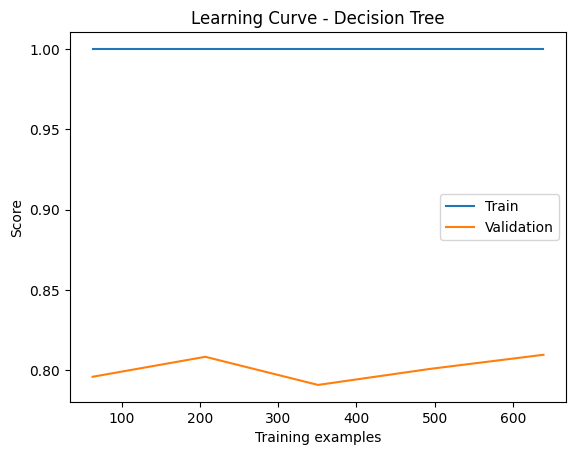

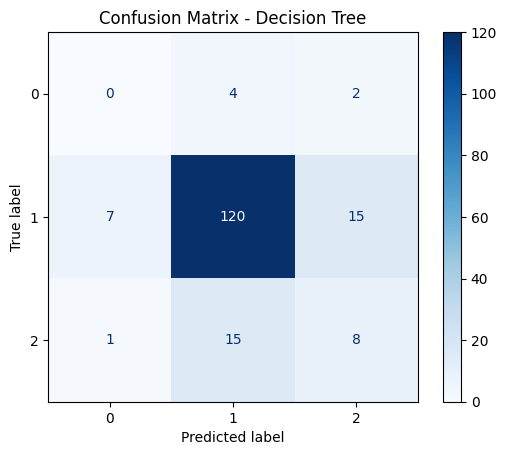

Training: Random Forest


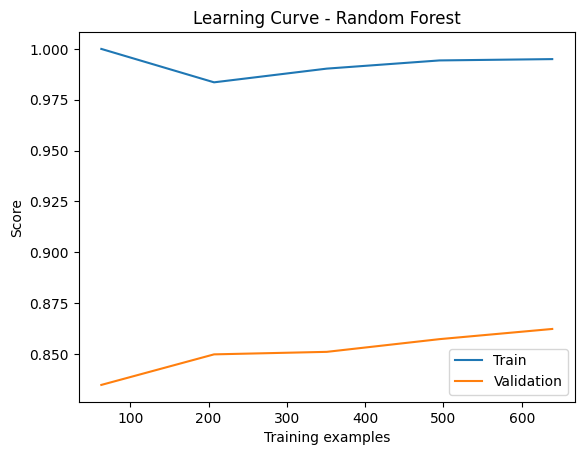

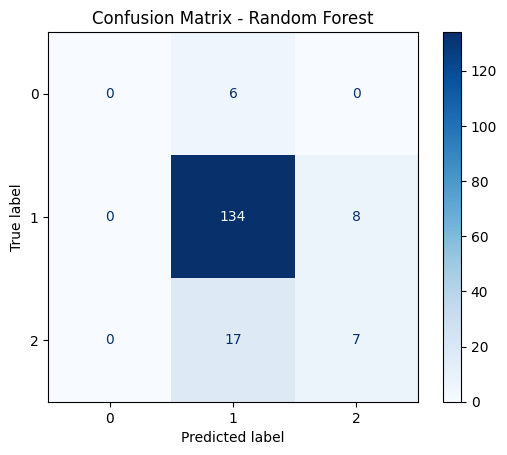

Training: XGBoost


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py", line 1559, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expec

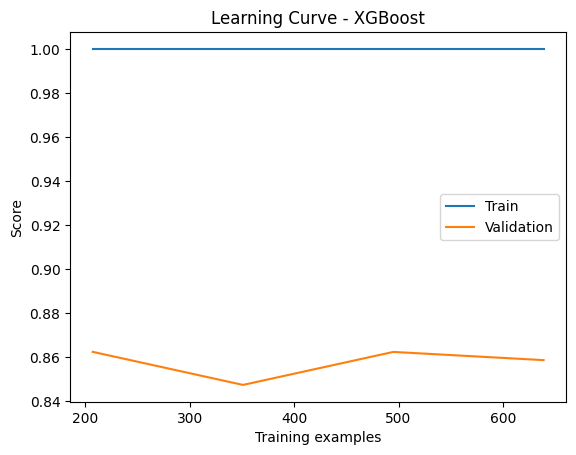

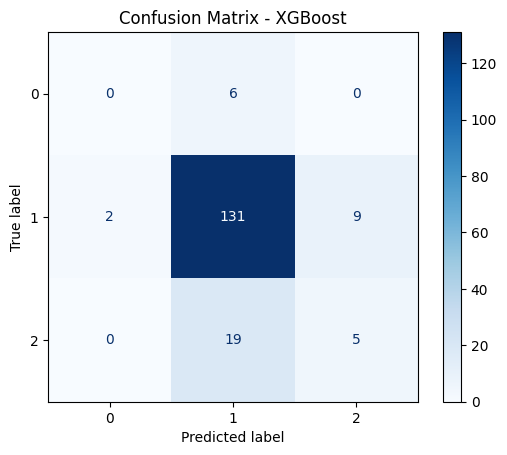

Training: LightGBM


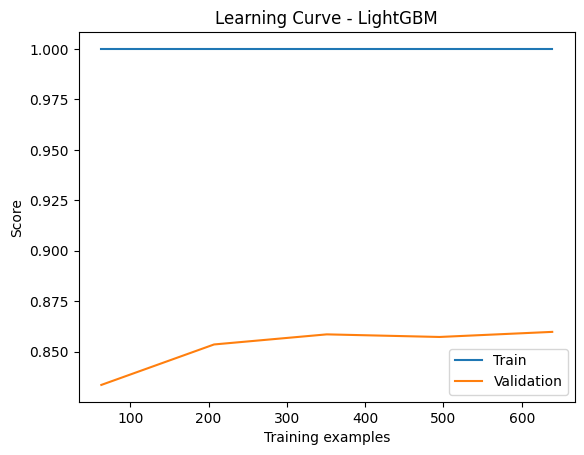

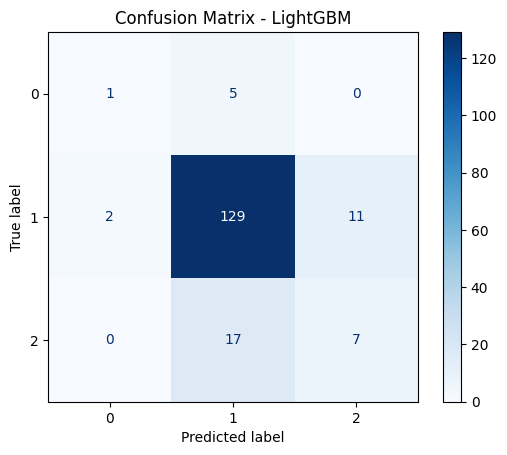

Training: CatBoost


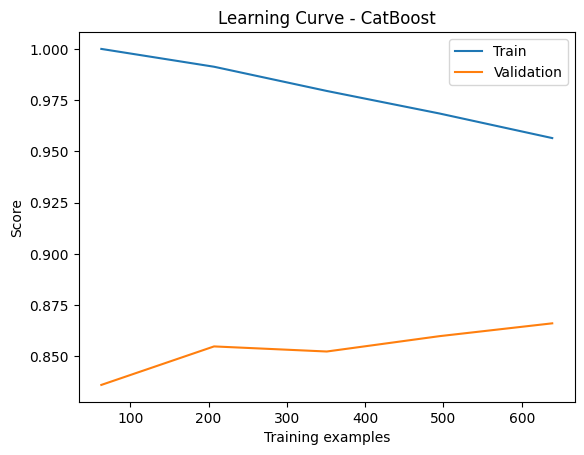

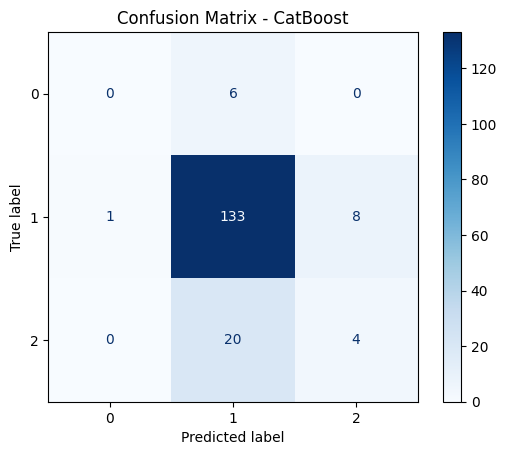

Training: SVM


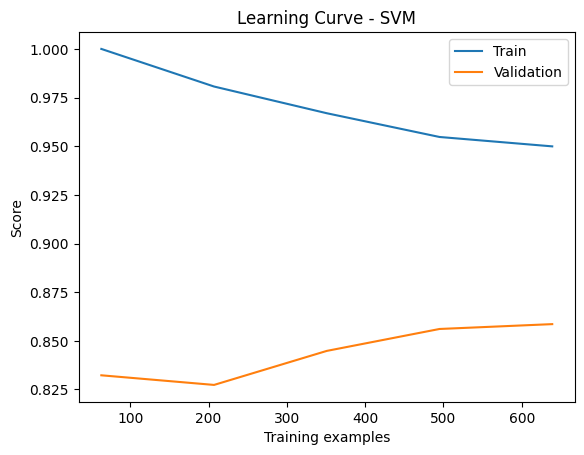

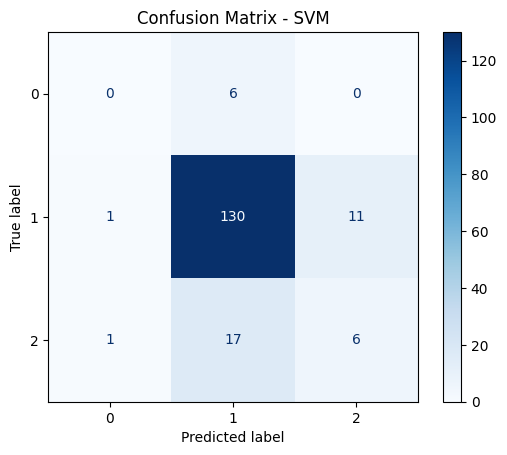

Training: KNN


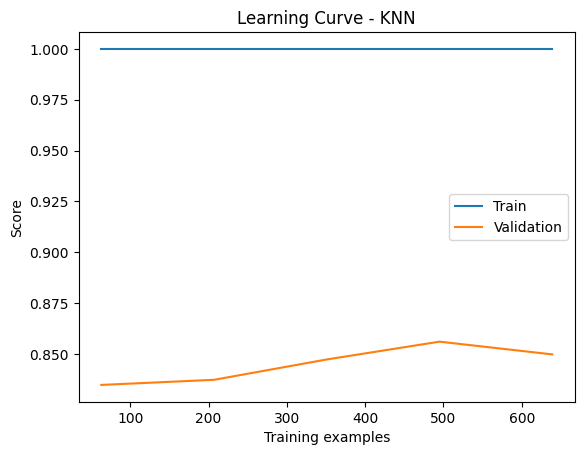

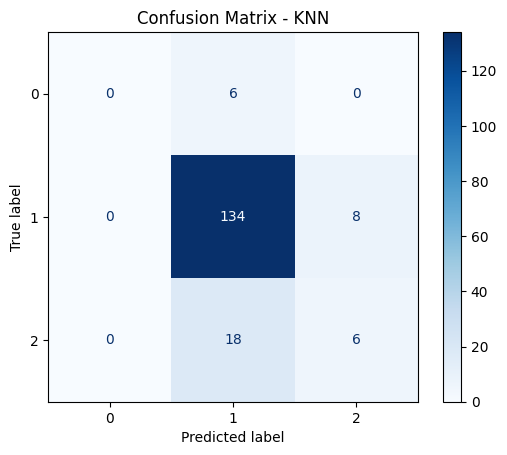

Training: MLP


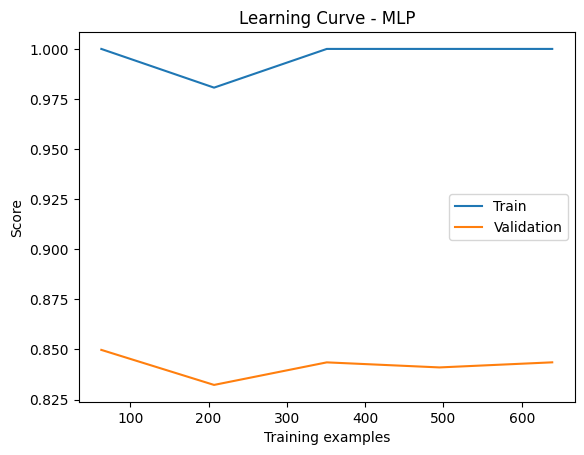

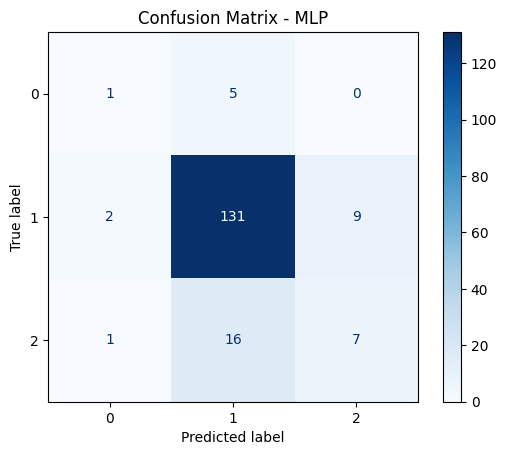

Training: Voting


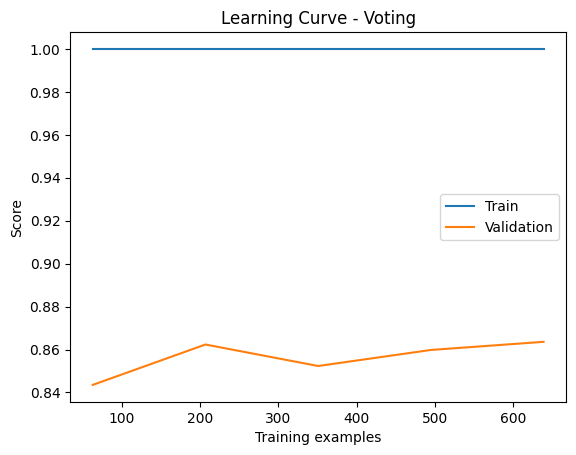

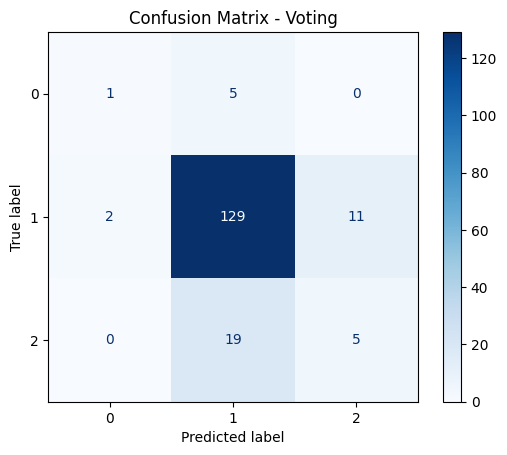

Training: Stacking


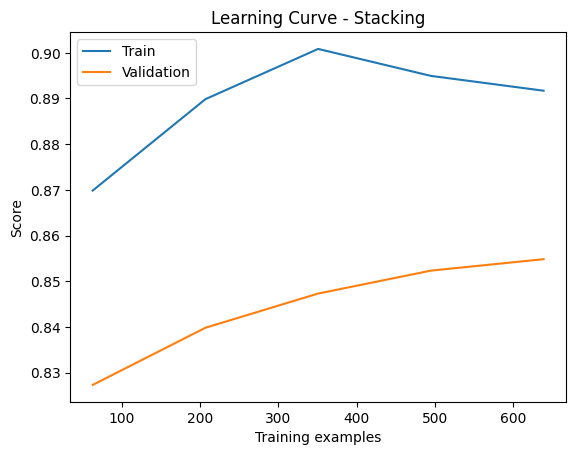

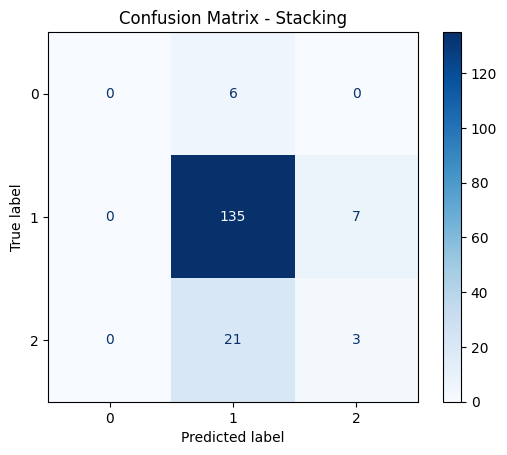

In [34]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)

# Сравнение моделей
models = {
    "Dummy": DummyClassifier(strategy='most_frequent'),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_split=4, random_state=42),
    "XGBoost": xgb.XGBClassifier(ueval_metric='mlogloss'),
    "LightGBM": lgb.LGBMClassifier(n_estimators=200, learning_rate=0.05, verbose=-1),
    "CatBoost": cb.CatBoostClassifier(verbose=0, iterations=300, learning_rate=0.05, depth=6),
    "SVM": SVC(kernel='rbf', C=10, gamma='scale', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=10, weights='distance'),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000),
    "Voting": VotingClassifier(estimators=[
        ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
        ('rf', RandomForestClassifier()),
        ('lgb', lgb.LGBMClassifier())
    ], voting='soft'),
    "Stacking": StackingClassifier(estimators=[
        ('svm', SVC(probability=True)),
        ('knn', KNeighborsClassifier()),
        ('mlp', MLPClassifier(max_iter=300))
    ], final_estimator=LogisticRegression(max_iter=1000))
}

results = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


for name, model in models.items():
    print(f"Training: {name}")

    # Accuracy
    acc_scores = cross_val_score(model, X_train, y_train_encoded, cv=skf, scoring='accuracy')
    mean_acc = acc_scores.mean()

    # F1 macro
    f1_scores = cross_val_score(model, X_train, y_train_encoded, cv=skf, scoring='f1_macro')
    mean_f1 = f1_scores.mean()

    results.append({
        "Model": name,
        "Accuracy": mean_acc,
        "F1 Score": mean_f1
    })

    model.fit(X_train, y_train_encoded)
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val) if hasattr(model, "predict_proba") else None

    # Кривая обучения
    train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train_encoded, cv=5)
    plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
    plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation')
    plt.title(f"Learning Curve - {name}")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend()
    plt.show()

    # Матрица ошибок
    ConfusionMatrixDisplay.from_predictions(y_val_encoded, y_pred, cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Таблица сравнения
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)

In [35]:
print(results_df)

                  Model  Accuracy  F1 Score
6              CatBoost  0.868593  0.524093
10               Voting  0.866077  0.509153
5              LightGBM  0.862311  0.526000
7                   SVM  0.861085  0.504068
4               XGBoost  0.858546  0.520773
3         Random Forest  0.857311  0.490047
8                   KNN  0.854835  0.481738
11             Stacking  0.849819  0.459651
9                   MLP  0.848561  0.510129
1   Logistic Regression  0.836053  0.468836
0                 Dummy  0.827288  0.301826
2         Decision Tree  0.792217  0.479093
